In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [ ]:
bbox_frame = pd.read_csv('D:/GTSDB/FullIJCNN2013/gt.txt',sep=";", header=None)
bbox_frame

In [ ]:
len(bbox_frame)

In [ ]:
n = 1
img_name = bbox_frame.iloc[n, 0]
img_name

In [ ]:
bbox = bbox_frame.iloc[n,1:5].as_matrix()

In [6]:
bbox

array([983, 388, 1024, 432], dtype=object)

In [7]:
label = bbox_frame.iloc[n,5:].item()
label

40

In [8]:
bbox = bbox.astype('float').reshape(-1,2)

In [9]:
bbox

array([[ 983.,  388.],
       [1024.,  432.]])

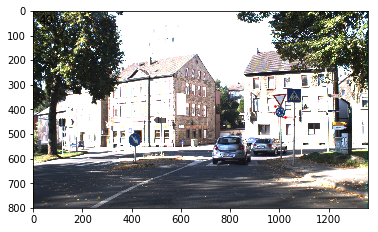

In [10]:
def show_bbox(image, bbox, label):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(bbox[:, 0], bbox[:, 1], s=10, marker='.', c='r')
    plt.text(20, 50, label, fontsize=12)
    plt.pause(0.001)  # pause a bit so that plots are updated
    label = label
    
plt.figure()
show_bbox(io.imread(os.path.join('C:/Users/TEXVNQA/Downloads/FullIJCNN2013', img_name)),
               bbox, label)
plt.show()

In [ ]:
class GTSDBDataset(Dataset):
    "GTSDB Dataset"
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.bbox_frame = pd.read_csv(csv_file,sep=";", header=None)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.bbox_frame)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.bbox_frame.iloc[idx, 0])  #img_name = bbox_frame.iloc[n, 0]

        image = io.imread(img_name)
        bbox = self.bbox_frame.iloc[idx, 1:5].as_matrix()
        bbox = bbox.astype('float').reshape(-1, 2)
        label = bbox_frame.iloc[idx,5:].item()
        sample = {'image': image, 'bbox': bbox, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample


In [ ]:
dataset = GTSDBDataset(csv_file = 'C:/Users/TEXVNQA/Downloads/FullIJCNN2013/gt.txt', 
                        root_dir='C:/Users/TEXVNQA/Downloads/FullIJCNN2013')

fig = plt.figure()
#print(dataset[0].image)

for i in range(len(dataset)):
    sample = dataset[i]

    print(i, sample['image'].shape, sample['bbox'].shape, sample['label'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

In [ ]:
class_names = sample['label']
class_names